# Titanic Analysis & Modeling & Predictions

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings("ignore")

In [4]:
df1 = pd.DataFrame() # our dataframe for training and validating
df2 = pd.DataFrame() # our dataframe for predicting

In [10]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
y_train = train["Survived"].values
print("Length of train set : ",len(train))

Length of train set :  891


In [11]:
y_train = train["Survived"].values
data = pd.concat([train.drop("Survived",axis=1),test],axis=0)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let Passenger Id our index, after 891th index(starts from 892) will be original test from kaggle given.

In [14]:
data.set_index("PassengerId",inplace=True)

In [16]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
data.drop(["Ticket","Cabin"],axis=1,inplace=True)

In [19]:
data.isna().sum()

Pclass        0
Name          0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [20]:
cat = [] # categorical columns
con = [] # continuous columns

3    709
1    323
2    277
Name: Pclass, dtype: int64


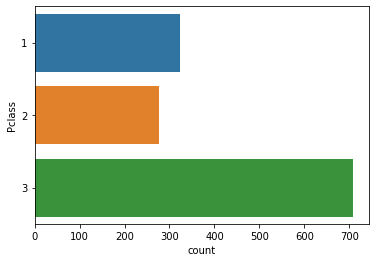

In [21]:
print(data["Pclass"].value_counts())
sns.countplot(y="Pclass",data=data);

In [22]:
cat.append("Pclass")

In [23]:
data["Name"].value_counts()

Connolly, Miss. Kate                  2
Kelly, Mr. James                      2
Reuchlin, Jonkheer. John George       1
Harmer, Mr. Abraham (David Lishin)    1
Hocking, Mr. Richard George           1
                                     ..
Palsson, Miss. Torborg Danira         1
Lang, Mr. Fang                        1
Riordan, Miss. Johanna Hannah""       1
Palsson, Miss. Stina Viola            1
Gustafsson, Mr. Alfred Ossian         1
Name: Name, Length: 1307, dtype: int64

In [24]:
def titler(ser):
    lst = []
    for i in ser:
        i = i.split(", ")[1].split(".")[0]
        lst.append(i)
    return lst

In [26]:
data["Title"] = titler(data["Name"])
data.drop("Name",axis=1,inplace=True)
data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,S,Mr
2,1,female,38.0,1,0,71.2833,C,Mrs
3,3,female,26.0,0,0,7.9250,S,Miss
4,1,female,35.0,1,0,53.1000,S,Mrs
5,3,male,35.0,0,0,8.0500,S,Mr


Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Major             2
Ms                2
Mlle              2
Capt              1
Mme               1
Dona              1
the Countess      1
Jonkheer          1
Lady              1
Don               1
Sir               1
Name: Title, dtype: int64


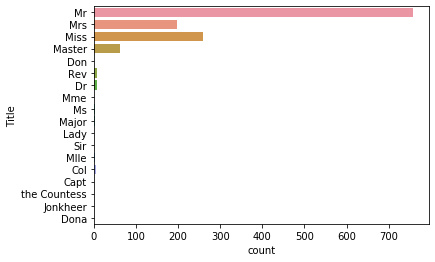

In [40]:
print(data["Title"].value_counts())
sns.countplot(y="Title",data=data);

In [29]:
cat.append("Title")

male      843
female    466
Name: Sex, dtype: int64


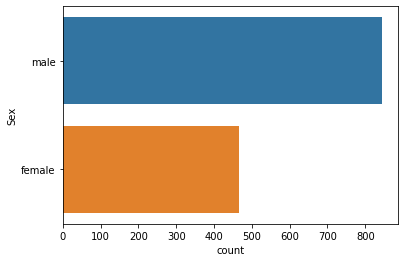

In [30]:
print(data["Sex"].value_counts())
sns.countplot(y="Sex",data=data);

In [31]:
cat.append("Sex")

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64


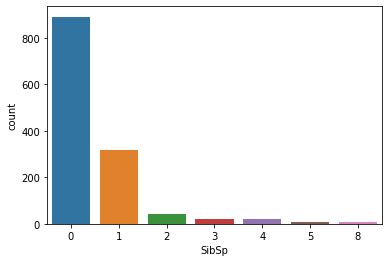

In [38]:
print(data["SibSp"].value_counts())
sns.countplot(x="SibSp",data=data);

In [33]:
cat.append("SibSp")

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64


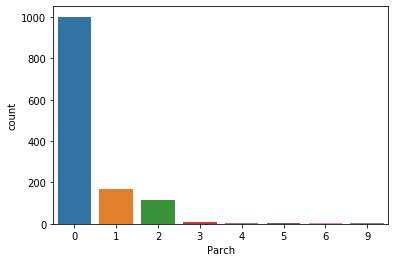

In [37]:
print(data["Parch"].value_counts())
sns.countplot(x="Parch",data=data);

In [41]:
cat.append("Parch")

Median of Fare :  14.4542


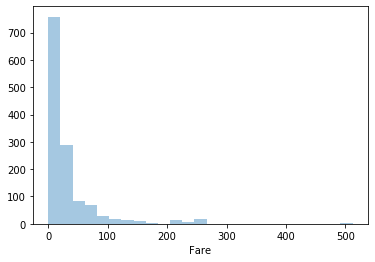

In [48]:
print("Median of Fare : ",data["Fare"].median())
sns.distplot(data["Fare"],kde=False,bins=25);

In [49]:
data["Fare"].fillna(data["Fare"].median(),inplace=True)
con.append("Fare")

S    914
C    270
Q    123
Name: Embarked, dtype: int64


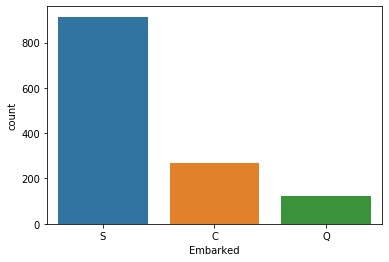

In [51]:
print(data["Embarked"].value_counts())
sns.countplot(x="Embarked",data=data);

In [52]:
data["Embarked"].fillna("S",inplace=True)

In [55]:
cat.append("Embarked")

In [57]:
data.corr()["Age"]

Pclass   -0.408106
Age       1.000000
SibSp    -0.243699
Parch    -0.150917
Fare      0.177528
Name: Age, dtype: float64

As we see Age column is correlated with Pclass, SibSp, Parch columns.

In [63]:
data["Age"].fillna(False,inplace=True)
for i in data.index:
    if data.loc[i,"Age"] == False:
        data.loc[i,"Age"] = data[(data["Parch"] == data["Parch"].loc[i])&(data["Pclass"] == data["Pclass"].loc[i])&(data["SibSp"] == data["SibSp"].loc[i])]["Age"].median()      

In [66]:
data["Age"].replace(False,data.median(),inplace=True)

In [71]:
con.append("Age")

In [68]:
data.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [74]:
data_final = pd.get_dummies(data,columns=cat,drop_first=True)

In [75]:
data_final

,Age,Fare,Pclass_2,Pclass_3,Title_Col,Title_Don,Title_Dona,Title_Dr,Title_Jonkheer,Title_Lady,...,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Parch_9,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,71.2833,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,7.9250,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35,53.1000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,35,8.0500,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,21,8.0500,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1306,39,108.9000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1307,38.5,7.2500,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [77]:
df1 = data_final.loc[:891,:]
df2 = data_final.loc[892:,:]

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [81]:
y = y_train
X = df1.values

In [82]:
log_reg = LogisticRegression()
log_reg.fit(X,y)
cv_log = cross_val_score(log_reg,X,y,cv=10)
print("CV score of Logistic Regression : ",cv_log.mean())

CV score of Logistic Regression :  0.8193258426966293


In [83]:
svc = SVC()
svc.fit(X,y)
cv_svc = cross_val_score(svc,X,y,cv=10)
print("CV score of SVC : ",cv_svc.mean())

CV score of SVC :  0.6746067415730337


In [84]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X,y)
cv_rfc = cross_val_score(rfc,X,y,cv=10)
print("CV score of Random Forest Regressor : ",cv_rfc.mean())

CV score of Random Forest Regressor :  0.8036454431960051


In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
cv_knn = cross_val_score(knn,X,y,cv=10)
print("CV score of KNN : ",cv_knn.mean())

CV score of KNN :  0.7105118601747815


### Time for prediction 

In [88]:
pas_id = list(df2.index)

In [90]:
prediction = log_reg.predict(df2.values)

In [92]:
submission = pd.DataFrame()
submission["PassengerId"] = pas_id
submission["Survived"] = prediction

In [98]:
submission["Survived"] = submission["Survived"].astype(int)

In [101]:
submission.to_csv("Submission.csv",index=False)

##### Kaggle accuracy for my predition is 0.7697